In [1]:
import pandas as pd
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.dummy import DummyClassifier

In [2]:
with open('mapper.pkl', 'rb') as open_file:
    mapper = pkl.load(open_file)

In [3]:
with open('observations.pkl', 'rb') as open_file:
    df = pkl.load(open_file)

In [5]:
with open('RFresults.pkl', 'rb') as open_file:
    resdf = pkl.load(open_file)

In [6]:
rf_best_est = resdf['estimator'][0].best_estimator_

In [7]:
rf_best_est

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [8]:
with open('RF_best_estimator.pkl', 'wb') as open_file:
    pkl.dump(rf_best_est, open_file)

In [9]:
X = mapper.fit_transform(df)

/home/dlahtou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
y = df['funded']

In [11]:
dummy = DummyClassifier()
dummy.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [12]:
y_pred = rf_best_est.predict(X)
y_dummy = dummy.predict(X)

In [13]:
confusion_matrix(y, y_pred)

array([[    0,  4174],
       [    0, 18583]])

In [14]:
confusion_matrix(y, y_dummy)

array([[  720,  3454],
       [ 3431, 15152]])

In [15]:
y_proba = rf_best_est.predict_proba(X)[:,1]

In [16]:
roc_auc_score(y, y_proba)

0.5878827068374084

In [17]:
cols = mapper.transformed_names_

In [18]:
imps = rf_best_est.feature_importances_

In [19]:
import matplotlib.pyplot as plt

In [20]:
sorted_imps = sorted(list(zip(cols, imps)), key=lambda a: a[1], reverse=True)

In [21]:
import operator

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

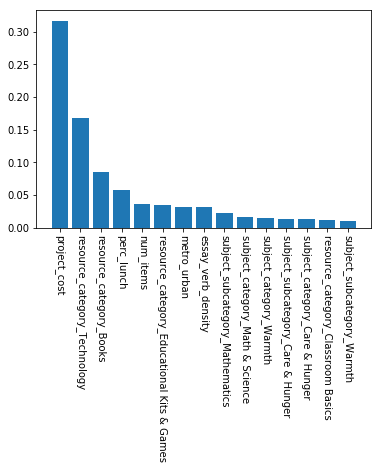

In [22]:
plt.bar([x[0] for x in sorted_imps[:15]], [x[1] for x in sorted_imps[:15]])
plt.xticks(rotation=-90)